In [ ]:
# Test 3-1 Dataset C
# This test uses a simple CNN to classify between having an Square or a Circle

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
tf.config.list_physical_devices('GPU')

2024-03-31 20:20:42.699380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 20:20:42.699398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 20:20:42.700072: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 20:20:42.704303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 20:20:43.420846: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../../Generator/Datasets/Dataset_C/train'
test_dir = '../../Generator/Datasets/Dataset_C/test'

In [3]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

308


In [57]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
    )

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
conv_base = VGG16(weights="imagenet", include_top=False)
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

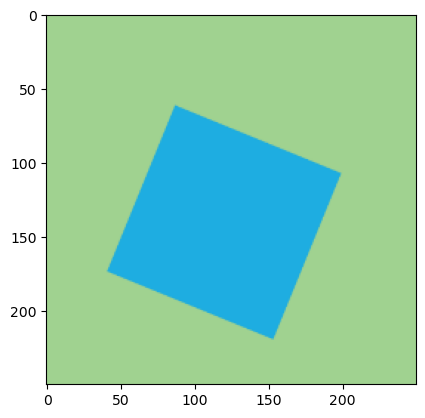

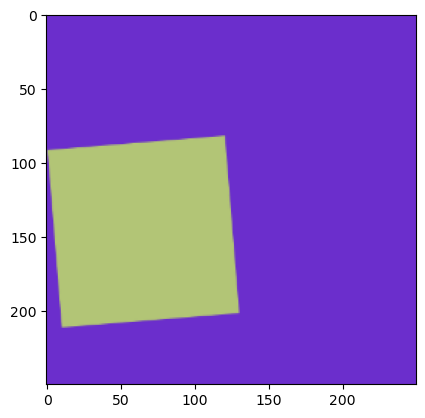

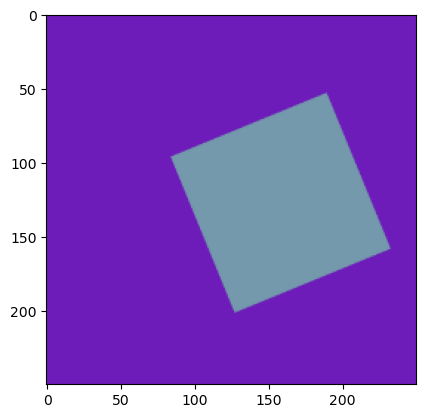

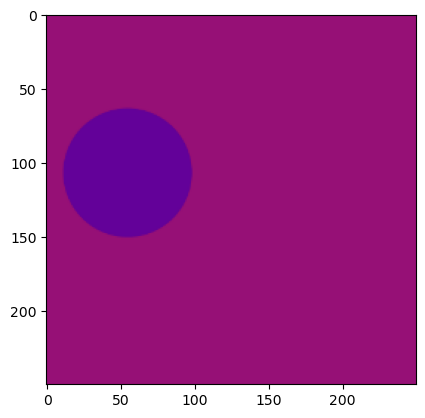

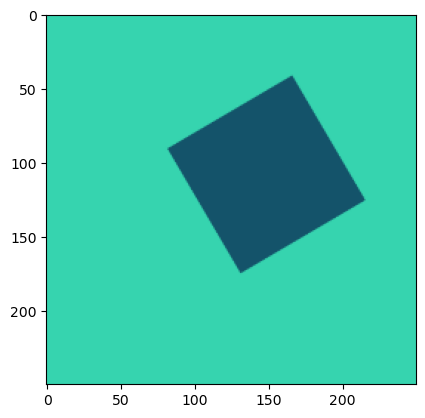

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [8]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [9]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 250, 250, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 250, 250, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422

In [11]:
checkpoint_filepath = 'models/3-3/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [12]:
#Best Epoch 4 = loss: 0.0161 - acc: 0.9980 - val_loss: 0.0072 - val_acc: 0.9990

history = model.fit(train_dataset, epochs=5, batch_size=16, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/5


2024-03-31 20:21:08.087767: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-03-31 20:21:08.172698: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-31 20:21:13.964927: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa65500f600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-31 20:21:13.964956: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-31 20:21:13.968781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1711912874.001947   27651 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 [==============================] - ETA: 0s - loss: 0.2200 - acc: 0.9803
Epoch 1: val_loss improved from inf to 0.00231, saving model to models/3-3/ch-001.ckpt
INFO:tensorflow:Assets written to: models/3-3/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/3-3/ch-001.ckpt/assets


94/94 [==============================] - 35s 298ms/step - loss: 0.2200 - acc: 0.9803 - val_loss: 0.0023 - val_acc: 0.9990
Epoch 2/5
94/94 [==============================] - ETA: 0s - loss: 6.0107e-04 - acc: 0.9997
Epoch 2: val_loss improved from 0.00231 to 0.00026, saving model to models/3-3/ch-002.ckpt
INFO:tensorflow:Assets written to: models/3-3/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/3-3/ch-002.ckpt/assets


94/94 [==============================] - 21s 220ms/step - loss: 6.0107e-04 - acc: 0.9997 - val_loss: 2.6378e-04 - val_acc: 1.0000
Epoch 3/5
94/94 [==============================] - ETA: 0s - loss: 0.0050 - acc: 0.9993
Epoch 3: val_loss did not improve from 0.00026
94/94 [==============================] - 20s 208ms/step - loss: 0.0050 - acc: 0.9993 - val_loss: 0.0015 - val_acc: 0.9990
Epoch 4/5
94/94 [==============================] - ETA: 0s - loss: 2.8490e-05 - acc: 1.0000
Epoch 4: val_loss did not improve from 0.00026
94/94 [==============================] - 20s 208ms/step - loss: 2.8490e-05 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 0.9990
Epoch 5/5
94/94 [==============================] - ETA: 0s - loss: 0.0109 - acc: 0.9990
Epoch 5: val_loss did not improve from 0.00026
94/94 [==============================] - 20s 209ms/step - loss: 0.0109 - acc: 0.9990 - val_loss: 0.0012 - val_acc: 0.9995


In [13]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

63/63 [==============================] - 8s 129ms/step - loss: 0.0012 - acc: 0.9995
0.001163722830824554 0.9994999766349792


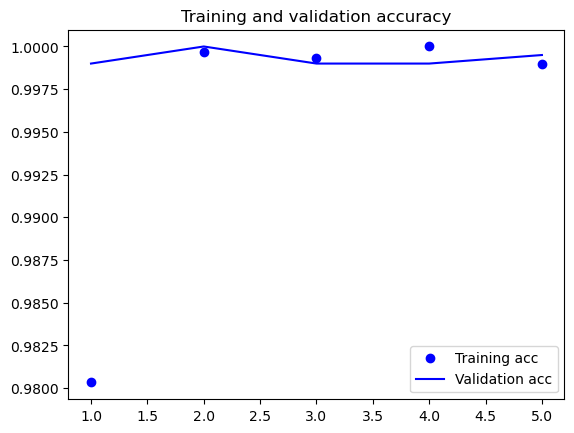

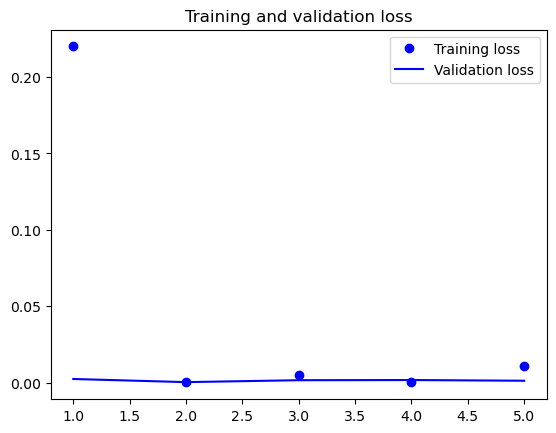

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/3-3/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/3-3/train_test_acc",dpi=100)
plt.show()


In [ ]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Datasets/Dataset_B/test/square/square_309.png', target_size=(IMG_SIZE, IMG_SIZE))

In [27]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Datasets/Dataset_C/test/circle/circle_1096.png', target_size=(IMG_SIZE, IMG_SIZE))

FileNotFoundError: [Errno 2] No such file or directory: '../../Generator/Datasets/Dataset_C/test/circle/circle_1096.png'

In [20]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 250, 250, 3)
1/1 [==============================] - 0s 423ms/step
Result:  [[0.]]


In [60]:
#create a csv that saves the index image the label and the prediction and saves it in the results folder
import csv
with open('results/3-3/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])



1/1 [==============================] - 0s 19ms/step


In [62]:
#prints the values where label is different then prediction
with open('results/3-3/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['730', '0', '1']


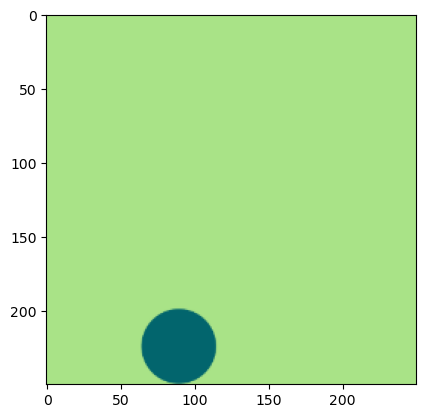

1/1 [==============================] - 0s 15ms/step
[[0.]]


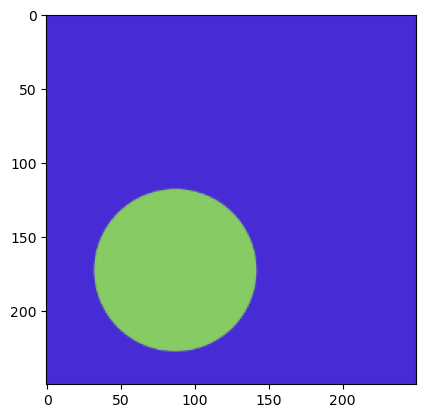

1/1 [==============================] - 0s 14ms/step
[[0.]]


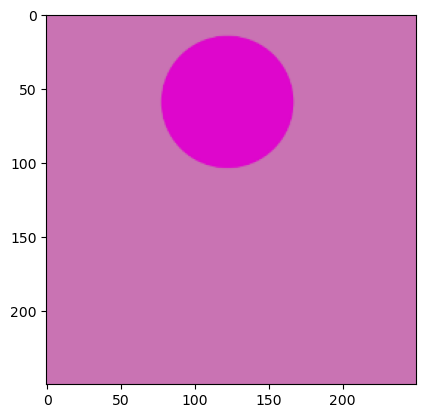

1/1 [==============================] - 0s 17ms/step
[[0.]]


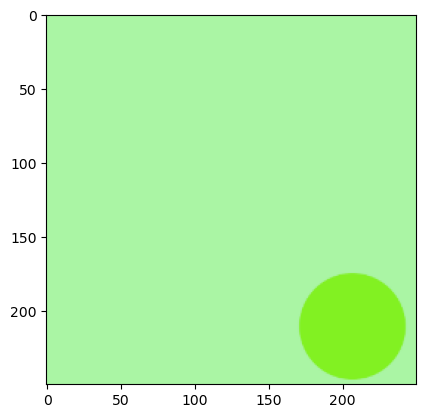

1/1 [==============================] - 0s 15ms/step
[[0.]]


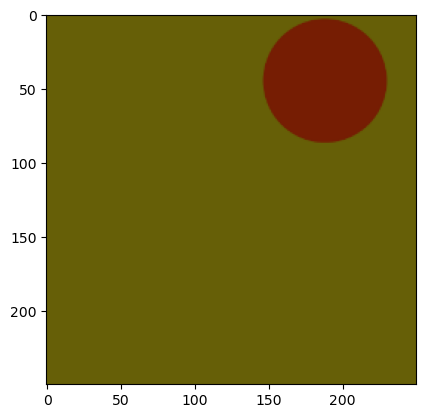

1/1 [==============================] - 0s 14ms/step
[[0.]]


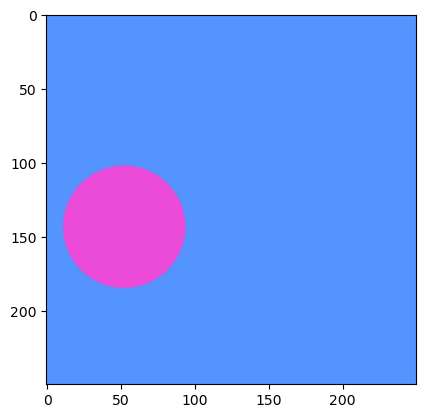

1/1 [==============================] - 0s 14ms/step
[[0.]]


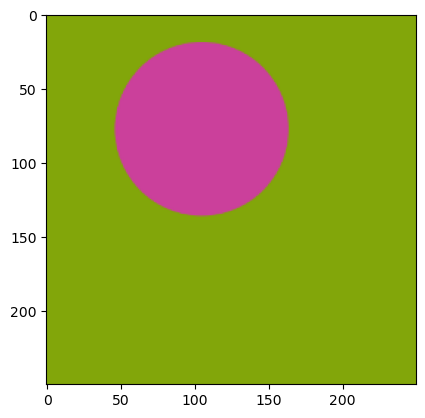

1/1 [==============================] - 0s 15ms/step
[[0.]]


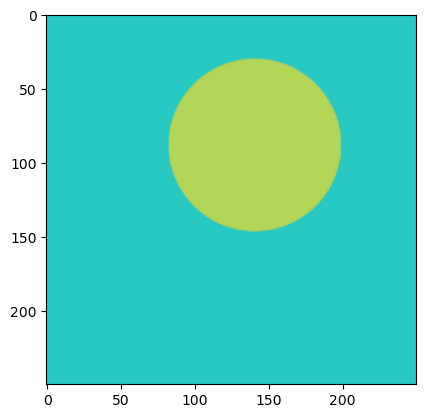

1/1 [==============================] - 0s 14ms/step
[[0.]]


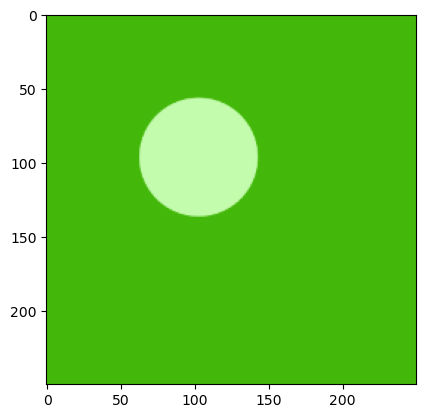

1/1 [==============================] - 0s 14ms/step
[[0.]]


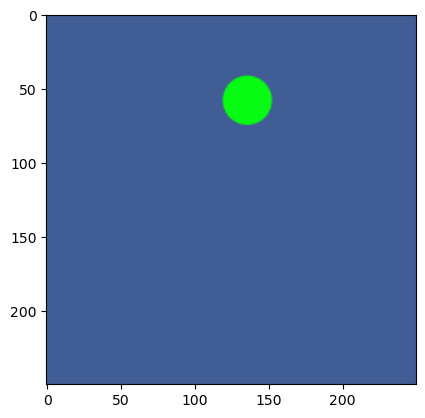

1/1 [==============================] - 0s 14ms/step
[[0.]]


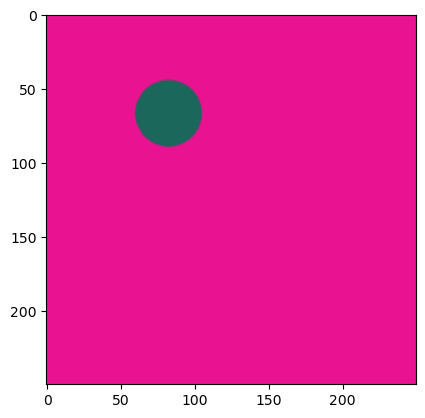

1/1 [==============================] - 0s 15ms/step
[[0.]]


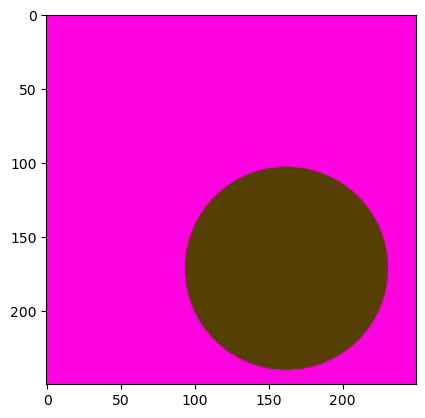

1/1 [==============================] - 0s 15ms/step
[[0.]]


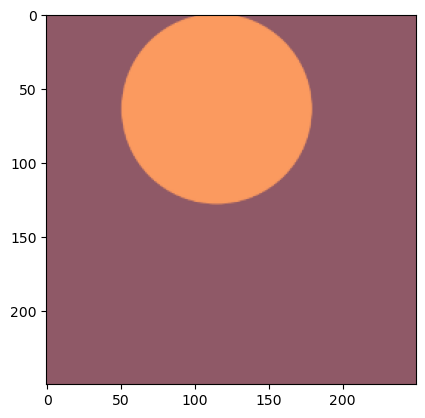

1/1 [==============================] - 0s 15ms/step
[[0.]]


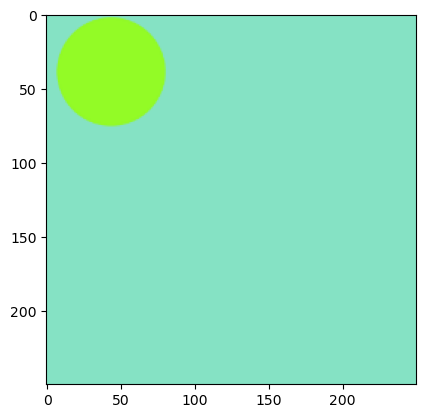

1/1 [==============================] - 0s 14ms/step
[[0.]]


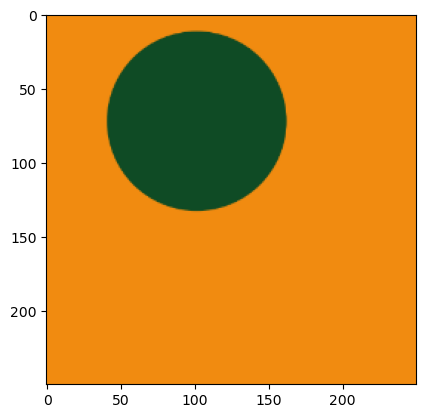

1/1 [==============================] - 0s 14ms/step
[[0.]]


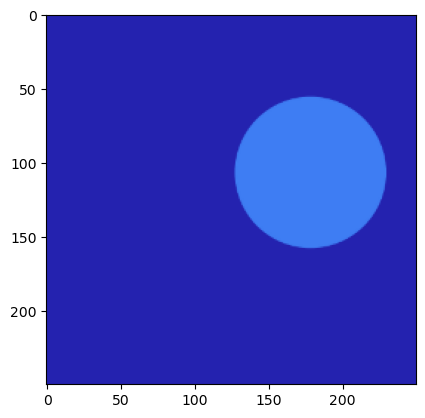

1/1 [==============================] - 0s 14ms/step
[[0.]]


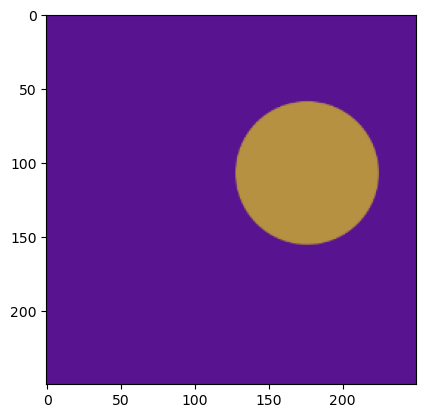

1/1 [==============================] - 0s 14ms/step
[[0.]]


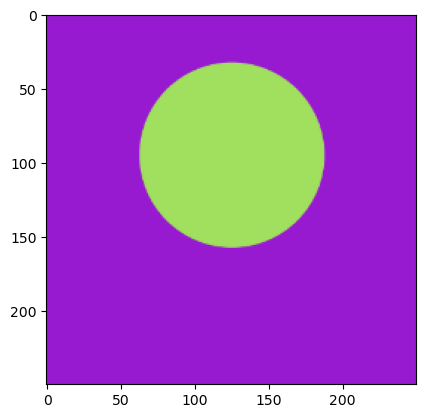

1/1 [==============================] - 0s 21ms/step
[[0.]]


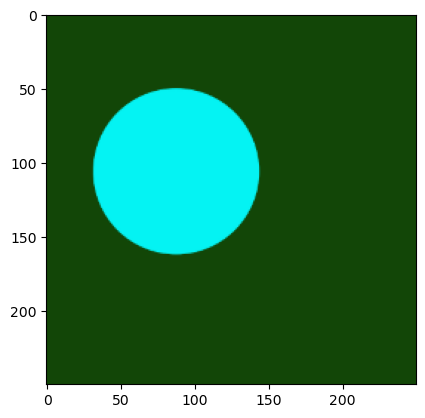

1/1 [==============================] - 0s 14ms/step
[[0.]]


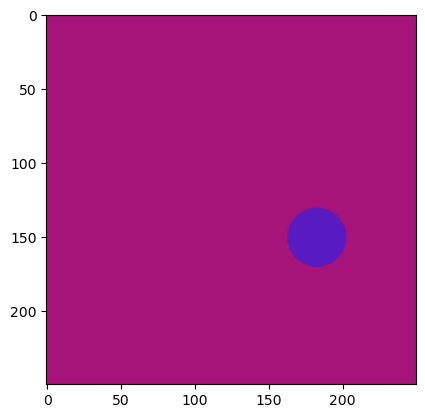

1/1 [==============================] - 0s 15ms/step
[[0.]]


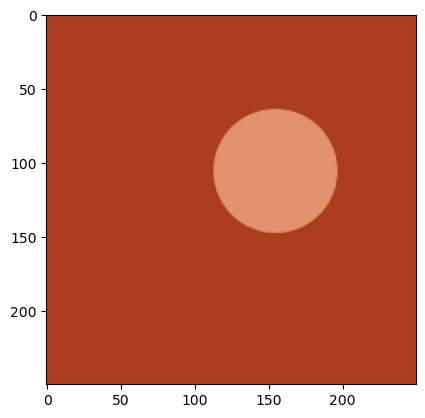

1/1 [==============================] - 0s 14ms/step
[[0.]]


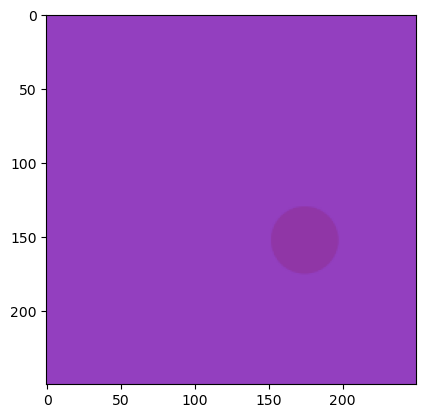

1/1 [==============================] - 0s 16ms/step
[[0.]]


In [64]:
#print the image 1095 from the test_dataset

for data_batch, _ in test_dataset.take(23):
    plt.imshow(data_batch[26].numpy().astype("uint8"))
    plt.show()
    print(model.predict(data_batch[26].numpy().reshape(1, 250, 250, 3)).round())
